In [44]:
import csv
import numpy as np
import pandas as pd
import random
import seaborn as sns
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


SEED = 472182
random.seed(SEED)
np.random.seed(SEED)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

In [45]:
data = pd.read_csv("stars_data.csv")
print("El tamaño del data set es:" ,data.shape)
data.describe(include='all')

El tamaño del data set es: (240, 6)


,Temperature,L,R,A_M,Color,Spectral_Class
count,240.000000,240.000000,240.000000,240.000000,240,240
unique,NaN,NaN,NaN,NaN,17,7
top,NaN,NaN,NaN,NaN,Red,M
freq,NaN,NaN,NaN,NaN,112,111
mean,10497.462500,107188.361635,237.157781,4.382396,NaN,NaN
std,9552.425037,179432.244940,517.155763,10.532512,NaN,NaN
min,1939.000000,0.000080,0.008400,-11.920000,NaN,NaN
25%,3344.250000,0.000865,0.102750,-6.232500,NaN,NaN
50%,5776.000000,0.070500,0.762500,8.313000,NaN,NaN
75%,15055.500000,198050.000000,42.750000,13.697500,NaN,NaN


In [46]:
data

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.17000,16.120,Red,M
1,3042,0.000500,0.15420,16.600,Red,M
2,2600,0.000300,0.10200,18.700,Red,M
3,2800,0.000200,0.16000,16.650,Red,M
4,1939,0.000138,0.10300,20.060,Red,M
5,2840,0.000650,0.11000,16.980,Red,M
6,2637,0.000730,0.12700,17.220,Red,M
7,2600,0.000400,0.09600,17.400,Red,M
8,2650,0.000690,0.11000,17.450,Red,M
9,2700,0.000180,0.13000,16.050,Red,M


In [47]:
pd.unique(data['Color'])

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

'Blue'>'Blue White'='Blue white'='Blue-White'='Blue-white'>'Whitish'='White'='white'>'Yellowish White'>'White-Yellow'='yellow-white'>'yellowish'='Yellowish'>'Pale yellow orange'>'Orange'>'Orange-Red'>'Red'

O > B > A > F > G > K > M

In [48]:
colors = {"Blue": ["Blue"],"Blue-White": ["Blue-White", "Blue White", "Blue white", "Blue-white"],
          "White": ["White","white","Whitish"],"Yellowish White": ["Yellowish White"],
          "Yellow-White": ["White-Yellow","yellow-white", "Yellow-White"],"Yellowish":["Yellowish","yellowish"],
          "Pale-Yellow-Orange":["Pale yellow orange", "Pale-Yellow-Orange"], "Orange": ["Orange"],
          "Orange-Red":["Orange-Red"], "Red":["Red"]}

def traduccion(dato):
    for key, values in colors.items():
        if dato in values:
            return key
        
data['Color'] = data['Color'].apply(lambda x: traduccion(x))

In [49]:
data

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.17000,16.120,Red,M
1,3042,0.000500,0.15420,16.600,Red,M
2,2600,0.000300,0.10200,18.700,Red,M
3,2800,0.000200,0.16000,16.650,Red,M
4,1939,0.000138,0.10300,20.060,Red,M
5,2840,0.000650,0.11000,16.980,Red,M
6,2637,0.000730,0.12700,17.220,Red,M
7,2600,0.000400,0.09600,17.400,Red,M
8,2650,0.000690,0.11000,17.450,Red,M
9,2700,0.000180,0.13000,16.050,Red,M


# Codificación

## One hot encoding

In [50]:
data_hot = data
data_hot_color = data_hot[["Color"]]
data_hot_spectre = data_hot[["Spectral_Class"]]
hot_encoder = OneHotEncoder()
data_hot_color_encoded = hot_encoder.fit_transform(data_hot_color).toarray()
cabecera_color_encoded = hot_encoder.get_feature_names_out()
data_hot_spectre_encoded = hot_encoder.fit_transform(data_hot_spectre).toarray()
cabeceras_spectre_encoded = hot_encoder.get_feature_names_out()
data_hot = data_hot.drop(['Color', 'Spectral_Class'], axis=1)

data_hot_color_df = pd.DataFrame(data_hot_color_encoded, columns = cabecera_color_encoded)
data_hot_spectre_df = pd.DataFrame(data_hot_spectre_encoded, columns = cabeceras_spectre_encoded)

data_hot = pd.concat([data_hot, data_hot_color_df, data_hot_spectre_df], axis=1)
data = pd.concat([data, data_hot_color_df, data_hot_spectre_df], axis=1)

pd.set_option('display.max_rows', 10)
data_hot

,Temperature,L,R,A_M,Color_Blue,Color_Blue-White,Color_Orange,Color_Orange-Red,Color_Pale-Yellow-Orange,Color_Red,Color_White,Color_Yellow-White,Color_Yellowish,Color_Yellowish White,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3042,0.000500,0.1542,16.60,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2600,0.000300,0.1020,18.70,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2800,0.000200,0.1600,16.65,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1939,0.000138,0.1030,20.06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
236,30839,834042.000000,1194.0000,-10.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
237,8829,537493.000000,1423.0000,-10.73,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
238,9235,404940.000000,1112.0000,-11.23,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Codificación Ordinaria

In [51]:
pd.set_option('display.max_rows', 300)
spectre = [["O","B","A","F","G","K","M"]]

data_ordinary = data
data_ordinary_color = data_ordinary[["Color"]]
data_ordinary_spectre = data_ordinary[["Spectral_Class"]]
dict_keys = [list(colors.keys())]
ordinal_encoder_color = OrdinalEncoder(categories=dict_keys)
ordinal_encoder_spectre = OrdinalEncoder(categories=spectre)

data_ordinary_color_encoded = ordinal_encoder_color.fit_transform(data_ordinary_color)
cabecera_color_encoded = ordinal_encoder_color.get_feature_names_out()
data_ordinary_spectre_encoded = ordinal_encoder_spectre.fit_transform(data_ordinary_spectre)
cabeceras_spectre_encoded = ordinal_encoder_spectre.get_feature_names_out()
data_ordinary = data_ordinary.drop(['Color', 'Spectral_Class'], axis=1)

data_ordinary_color_df = pd.DataFrame(data_ordinary_color_encoded, columns = cabecera_color_encoded)
data_ordinary_spectre_df = pd.DataFrame(data_ordinary_spectre_encoded, columns = cabeceras_spectre_encoded)

data_ordinary = pd.concat([data_ordinary, data_ordinary_color_df, data_ordinary_spectre_df], axis=1)
data = pd.concat([data, data_ordinary_color_df, data_ordinary_spectre_df], axis=1)

data_ordinary

,Temperature,L,R,A_M,Color_Blue,Color_Blue-White,Color_Orange,Color_Orange-Red,Color_Pale-Yellow-Orange,Color_Red,Color_White,Color_Yellow-White,Color_Yellowish,Color_Yellowish White,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,Color,Spectral_Class
0,3068,0.002400,0.17000,16.120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,6.0
1,3042,0.000500,0.15420,16.600,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,6.0
2,2600,0.000300,0.10200,18.700,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,6.0
3,2800,0.000200,0.16000,16.650,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,6.0
4,1939,0.000138,0.10300,20.060,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,6.0
5,2840,0.000650,0.11000,16.980,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,6.0
6,2637,0.000730,0.12700,17.220,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,6.0
7,2600,0.000400,0.09600,17.400,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,6.0
8,2650,0.000690,0.11000,17.450,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,6.0
9,2700,0.000180,0.13000,16.050,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,6.0


In [52]:
pd.set_option('display.max_rows', 10)
data

,Temperature,L,R,A_M,Color,Spectral_Class,Color_Blue,Color_Blue-White,Color_Orange,Color_Orange-Red,Color_Pale-Yellow-Orange,Color_Red,Color_White,Color_Yellow-White,Color_Yellowish,Color_Yellowish White,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,6.0
1,3042,0.000500,0.1542,16.60,Red,M,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,6.0
2,2600,0.000300,0.1020,18.70,Red,M,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,6.0
3,2800,0.000200,0.1600,16.65,Red,M,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,6.0
4,1939,0.000138,0.1030,20.06,Red,M,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
236,30839,834042.000000,1194.0000,-10.63,Blue,O,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
237,8829,537493.000000,1423.0000,-10.73,White,A,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
238,9235,404940.000000,1112.0000,-11.23,White,A,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0


# Escalado de Datos

In [53]:
# Escalame esta
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_ordinary_scaled = std_scaler.fit_transform(data_ordinary)
data_hot_scaled = std_scaler.fit_transform(data_hot)

# PCA

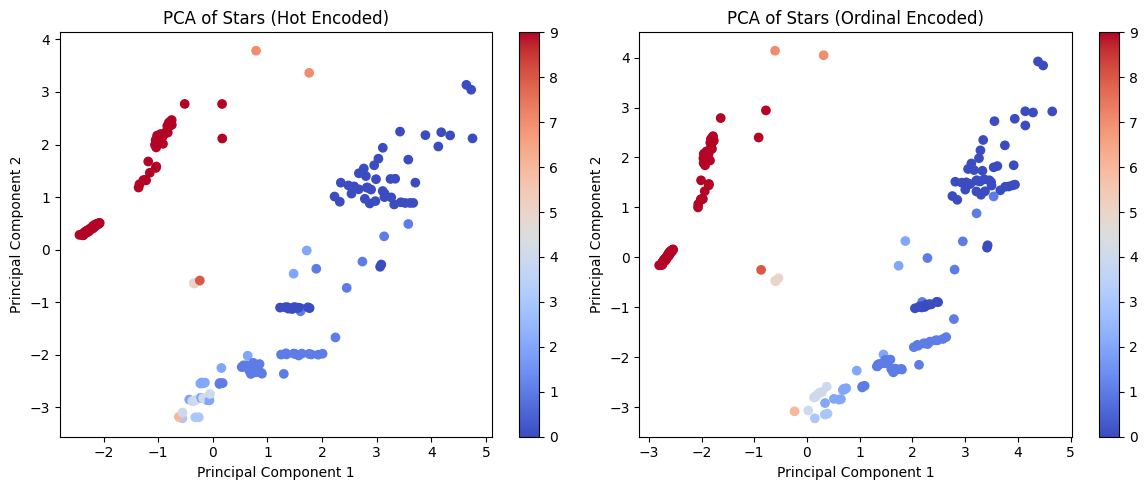

In [54]:
pca_model_hot = PCA(n_components=2)
pca_hot = pca_model_hot.fit_transform(data_hot_scaled)

pca_model_ordinal = PCA(n_components=2)
pca_ordinal= pca_model_ordinal.fit_transform(data_ordinary_scaled)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

scatter_hot = axs[0].scatter(pca_hot[:, 0], pca_hot[:, 1], c=data_ordinary["Color"], cmap='coolwarm')
fig.colorbar(scatter_hot,ax=axs[0])
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')
axs[0].set_title('PCA of Stars (Hot Encoded)')

scatter_ordinal = axs[1].scatter(pca_ordinal[:, 0], pca_ordinal[:, 1], c=data_ordinary["Color"], cmap='coolwarm')
fig.colorbar(scatter_ordinal, ax=axs[1])
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].set_title('PCA of Stars (Ordinal Encoded)')


plt.tight_layout()
plt.show()

# My K-Means

In [140]:
class MyKMeans:
    def __init__(self, n_clusters = 2, max_iter = 3000, tol = 1e-4, random_state = None) -> None:
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.cluster_centers_ = []
        self._class_puntos = []
        for i in range(self.n_clusters):
            self._class_puntos.append(np.array([]))
        self.labels = []

        
    def fit(self,X):
        self._init_centroides(X)
        self._iteraciones(X)

    def predict(self,X):
        self._clasificacion_puntos(X)
        self._resultado_final(X)
        return self.labels
    
    def fit_predict(self, X):
        self.fit(X)
        self.predict(X)
        return self.labels

    def _init_centroides(self, X):
        
        random.seed(self.random_state)
        n = 0
        while (n < self.n_clusters):
            indice = random.randint(0,len(X)-1)
            centroide = X[indice]
            condicion = not any(np.array_equal(centroide, c) for c in self.cluster_centers_)
            if condicion:
                self.cluster_centers_.append(centroide)
                n+=1

    def _distancia(self, punto1, punto2):
        return np.sqrt(np.sum((punto1 - punto2) ** 2))
    

    def _elegir_centroide(self,punto1):
        minimo = float('inf')
        for i in range(self.n_clusters):
            distancia = self._distancia(punto1, self.cluster_centers_[i])
            if minimo > distancia:
                minimo = distancia
                clase = i
        if len(self._class_puntos[clase]) == 0:
            self._class_puntos[clase] = np.append(self._class_puntos[clase],punto1)
        else:
            self._class_puntos[clase] = np.vstack((self._class_puntos[clase],punto1))


    def _clasificacion_puntos(self,X):
        for i in range(self.n_clusters):
            self._class_puntos[i] = np.array([])

        for row in X:
            self._elegir_centroide(row)


    def _iteraciones(self,X):
        old = self.cluster_centers_
        continua = True
        
        while continua:
            
            self._clasificacion_puntos(X)
            old = self.cluster_centers_
            self._recalcular()
            continua = False
            for i in range(self.n_clusters):
                if self._distancia(self.cluster_centers_[i],old[i]) > self.tol:
                    continua = True
                    break
        self._resultado_final(X)

    def _recalcular(self):
        old_clusters = self.cluster_centers_
        self.cluster_centers_ = []
        for k in range(self.n_clusters):
            if len(self._class_puntos[k]) > 0:
                self.cluster_centers_.append(np.mean(self._class_puntos[k],axis =0))
            else:
                self.cluster_centers_.append(old_clusters[k])

    def _resultado_final(self,X):
        self.labels = []
        for row in X:
            for i in range(self.n_clusters):
                if len(self._class_puntos[i] > 0) and row in self._class_puntos[i]:
                    self.labels.append(i)
                    break



## One hot encoding

In [105]:
my_kmeans_hot = MyKMeans(n_clusters=6,tol=1e-4,random_state=SEED)


my_kmeans_hot.fit(pca_hot)
myhot_predict = my_kmeans_hot.predict(pca_hot)


In [106]:


model_K_means_hot = KMeans(n_clusters=6, random_state=SEED)

model_K_means_hot.fit(pca_hot)
hot_predict = model_K_means_hot.predict(pca_hot)


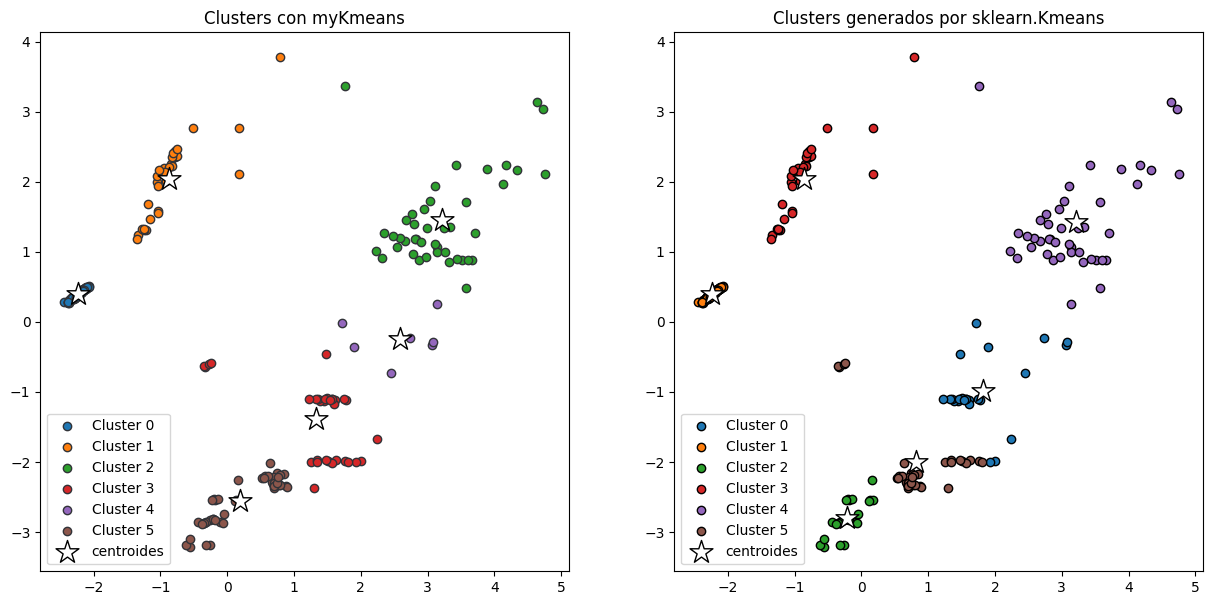

In [107]:

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

for i in np.unique(myhot_predict):
    ax[0].scatter(
        x = pca_hot[myhot_predict == i, 0],
        y = pca_hot[myhot_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = '#313338',
        label= f"Cluster {i}"
    )


for i in np.unique(hot_predict):
    ax[1].scatter(
        x = pca_hot[hot_predict == i, 0],
        y = pca_hot[hot_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

x = [centroide[0] for centroide in my_kmeans_hot.cluster_centers_]
y = [centroide[1] for centroide in my_kmeans_hot.cluster_centers_]
ax[0].scatter(
    x = x,
    y = y,
    c = 'white',
    s = 300,
    marker = '*',
    edgecolor = 'black',
    label  = 'centroides'
)

ax[1].scatter(
    x = model_K_means_hot.cluster_centers_[:, 0],
    y = model_K_means_hot.cluster_centers_[:, 1],
    c = 'white',
    s = 300,
    marker = '*',
    edgecolor = 'black',
    label  = 'centroides'
)

ax[0].set_title('Clusters con myKmeans')
ax[0].legend()
ax[1].set_title('Clusters generados por sklearn.Kmeans')
ax[1].legend()

## Ordinal encoding

In [137]:
my_kmeans_ord = MyKMeans(n_clusters=6,tol=1e-4,random_state=SEED)


my_kmeans_ord.fit(pca_ordinal)
myordinal_predict = my_kmeans_ord.predict(pca_ordinal)

[array([-2.69342751, -0.06069583]), array([-1.80139597,  2.17211792]), array([3.54125769, 1.80340185]), array([ 2.12173125, -0.99018922]), array([3.42680004, 0.24281864]), array([ 1.58265726, -2.04502777]), array([ 1.63810045, -2.30038649]), array([-2.75622593, -0.13356748]), array([-2.59364032,  0.09109482]), array([ 0.28539563, -2.69729085]), array([ 2.24105513, -0.95878894]), array([-2.70120176, -0.04880492]), array([ 0.64542182, -2.83854592]), array([ 2.28487073, -0.01236526]), array([-2.55740934,  0.13603097]), array([ 2.47568176, -1.65931787]), array([2.75835998, 1.22795916]), array([ 0.39021068, -3.127     ]), array([3.00222148, 1.35722106]), array([3.50085573, 1.43823472]), array([-1.86988496,  2.06064358]), array([-2.70195055, -0.05376139]), array([ 2.23181187, -0.99200348]), array([-2.6643715,  0.0108328])]


KeyboardInterrupt: 

In [109]:

model_K_means_ordinary = KMeans(n_clusters=6, random_state=SEED)
model_K_means_ordinary.fit(pca_ordinal)

ordinal_predict = model_K_means_ordinary.predict(pca_ordinal)

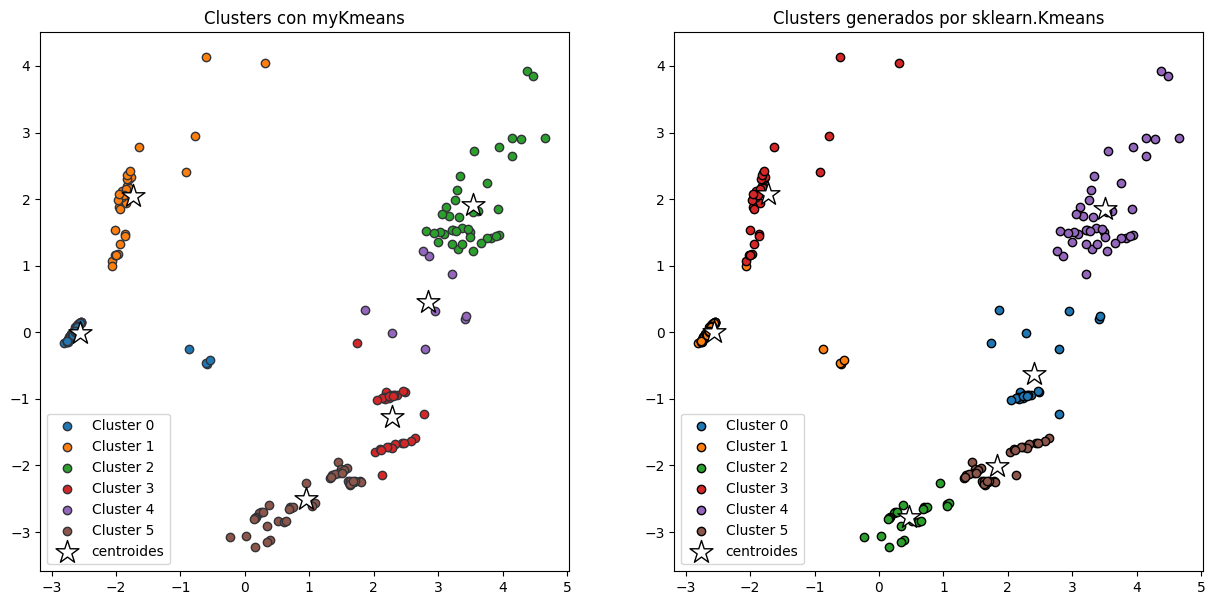

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

for i in np.unique(myordinal_predict):
    ax[0].scatter(
        x = pca_ordinal[myordinal_predict == i, 0],
        y = pca_ordinal[myordinal_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = '#313338',
        label= f"Cluster {i}"
    )


for i in np.unique(ordinal_predict):
    ax[1].scatter(
        x = pca_ordinal[ordinal_predict == i, 0],
        y = pca_ordinal[ordinal_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

x = [centroide[0] for centroide in my_kmeans_ord.cluster_centers_]
y = [centroide[1] for centroide in my_kmeans_ord.cluster_centers_]
ax[0].scatter(
    x = x,
    y = y,
    c = 'white',
    s = 300,
    marker = '*',
    edgecolor = 'black',
    label  = 'centroides'
)

ax[1].scatter(
    x = model_K_means_ordinary.cluster_centers_[:, 0],
    y = model_K_means_ordinary.cluster_centers_[:, 1],
    c = 'white',
    s = 300,
    marker = '*',
    edgecolor = 'black',
    label  = 'centroides'
)

ax[0].set_title('Clusters con myKmeans')
ax[0].legend()
ax[1].set_title('Clusters generados por sklearn.Kmeans')
ax[1].legend()

Text(0, 0.5, 'Media índices silhouette')

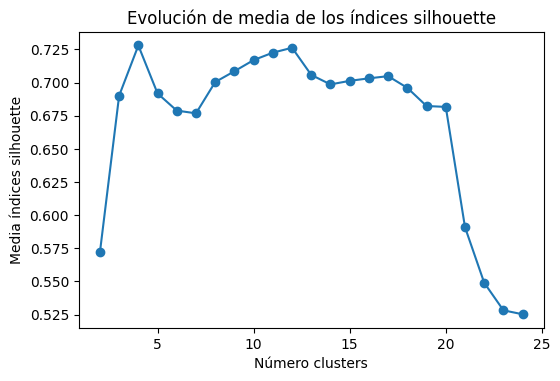

In [111]:
range_n_clusters = range(2, 25)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        random_state = SEED
    )
    cluster_labels = modelo_kmeans.fit_predict(pca_hot)
    silhouette_avg = silhouette_score(pca_hot, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')

Text(0, 0.5, 'Media índices silhouette')

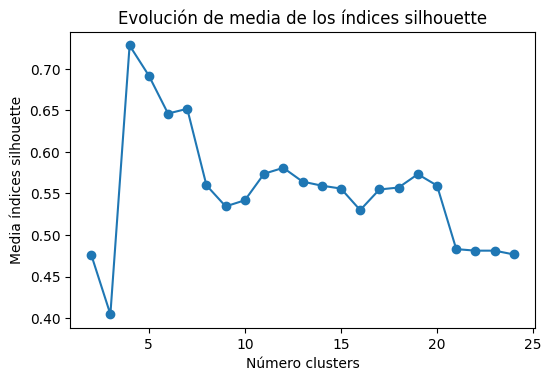

In [112]:
range_n_clusters = range(2, 25)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = MyKMeans(
        n_clusters   = n_clusters,
        random_state = SEED
    )
    cluster_labels = modelo_kmeans.fit_predict(pca_hot)
    silhouette_avg = silhouette_score(pca_hot, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')

Text(0, 0.5, 'Media índices silhouette')

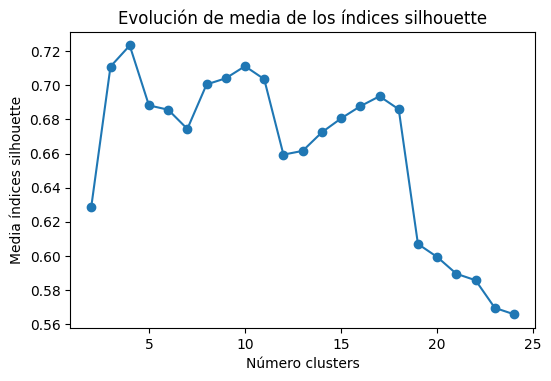

In [113]:
range_n_clusters = range(2, 25)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        random_state = SEED
    )
    cluster_labels = modelo_kmeans.fit_predict(pca_ordinal)
    silhouette_avg = silhouette_score(pca_ordinal, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')

[array([-2.69342751, -0.06069583]), array([-1.80139597,  2.17211792])]
[array([-2.69342751, -0.06069583]), array([-1.80139597,  2.17211792]), array([3.54125769, 1.80340185])]
[array([-2.69342751, -0.06069583]), array([-1.80139597,  2.17211792]), array([3.54125769, 1.80340185]), array([ 2.12173125, -0.99018922])]
[array([-2.69342751, -0.06069583]), array([-1.80139597,  2.17211792]), array([3.54125769, 1.80340185]), array([ 2.12173125, -0.99018922]), array([3.42680004, 0.24281864])]
[array([-2.69342751, -0.06069583]), array([-1.80139597,  2.17211792]), array([3.54125769, 1.80340185]), array([ 2.12173125, -0.99018922]), array([3.42680004, 0.24281864]), array([ 1.58265726, -2.04502777])]
[array([-2.69342751, -0.06069583]), array([-1.80139597,  2.17211792]), array([3.54125769, 1.80340185]), array([ 2.12173125, -0.99018922]), array([3.42680004, 0.24281864]), array([ 1.58265726, -2.04502777]), array([ 1.63810045, -2.30038649])]
[array([-2.69342751, -0.06069583]), array([-1.80139597,  2.172117

Text(0, 0.5, 'Media índices silhouette')

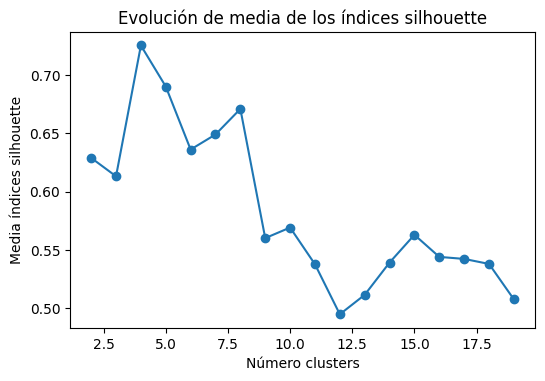

In [139]:
range_n_clusters = range(2, 20)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = MyKMeans(
        n_clusters   = n_clusters,
        random_state = SEED
    )
    cluster_labels = modelo_kmeans.fit_predict(pca_ordinal)
    silhouette_avg = silhouette_score(pca_ordinal, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')